## Imports | NN

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Imports | reading  csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Imports | PyTorch Data Iterator

In [3]:
from torch.utils.data.dataset import Dataset
from torchvision.transforms import transforms

## Viewing MetaData (or the whole data in this case)

In [4]:
df = pd.read_csv('TruthTableXOR.csv')[['IN1','IN2','OUT1','OUT2']]
df.head()

,IN1,IN2,OUT1,OUT2
0,0,0,0,1
1,0,1,1,0
2,1,0,1,0
3,1,1,0,1


### Extending class torchvision.Dataset to make custom data-iterator

In [5]:
class myData(Dataset):
    
    def __init__(self,df):
        
        self.X = [Variable(s) for s in torch.FloatTensor(df[['IN1','IN2']].values)]
        self.y = [Variable(s) for s in torch.FloatTensor(df[['OUT1','OUT2']].values)]
    
    def __getitem__(self,i):
        
        return self.X[i],self.y[i]

    def __len__(self):
        return len(self.X)                   

## Instance of the class

In [6]:
myDataObject = myData(df)

## Loading the object and making torchvision dataset object

In [7]:
Data_loader = torch.utils.data.DataLoader(dataset = myDataObject, batch_size = 1, shuffle = False)

## Defining Neural Network

In [8]:
class XORnet(nn.Module):
    
    def __init__(self):
        
        super(XORnet,self).__init__()
            
        self.linear1 = nn.Linear(in_features = 2, out_features = 3, bias = True)
        self.linear2 = nn.Linear(in_features = 3, out_features = 2, bias = True)
        
    def forward(self,t):
        
        t = self.linear1(t)
        t = F.relu(t)
        
        t = self.linear2(t)
        t = F.sigmoid(t)
        
        return t

## Making an XORnet object

In [9]:
myNet = XORnet()
myNet

XORnet(
  (linear1): Linear(in_features=2, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=2, bias=True)
)

## Defining Loss Function and Optimizer

In [10]:
optimizer = torch.optim.Adam(myNet.parameters(), lr=0.001,weight_decay=0.0001)
criterion = nn.MSELoss()

## Defining Training Function

In [11]:
def train(n_epochs):
    
    for i in range(n_epochs):
        
        eloss = 0 
        
        for u,(a1,a2)in enumerate(Data_loader):

            print(u,a1,a2)
            
            optimizer.zero_grad()   # zero the gradient buffers
            
            output = myNet(a1)
            loss = criterion(output, a2)
            eloss+=loss
            losses.append(loss)
            loss.backward()
            optimizer.step()
            
        print('Epoch: ',i, 'Loss', eloss/4)

## Training

In [12]:
net2 = XORnet()
losses = []
train(10000)

0 tensor([[0., 0.]]) tensor([[0., 1.]])


/home/sumit/.local/lib/python3.5/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  0 Loss tensor(0.2662, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1 Loss tensor(0.2659, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2 Loss tensor(0.2657, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3 Loss tensor(0.2655, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4 Loss tensor(0.

Epoch:  44 Loss tensor(0.2603, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  45 Loss tensor(0.2602, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  46 Loss tensor(0.2600, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  47 Loss tensor(0.2599, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  48 Loss tensor(0.2598, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 ten

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  85 Loss tensor(0.2565, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  86 Loss tensor(0.2564, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  87 Loss tensor(0.2563, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  88 Loss tensor(0.2562, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  89 Loss tens

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  125 Loss tensor(0.2527, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  126 Loss tensor(0.2526, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  127 Loss tensor(0.2525, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  128 Loss tensor(0.2524, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  129 Loss tensor(0.2523, grad_fn=<DivBackward0>)


3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  173 Loss tensor(0.2475, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  174 Loss tensor(0.2474, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  175 Loss tensor(0.2473, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  176 Loss tensor(0.2472, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  177 Loss tensor(0.2470, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])


1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  230 Loss tensor(0.2402, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  231 Loss tensor(0.2401, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  232 Loss tensor(0.2400, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  233 Loss tensor(0.2398, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  234 Loss

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  268 Loss tensor(0.2351, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  269 Loss tensor(0.2349, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  270 Loss tensor(0.2348, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  271 Loss tensor(0.2346, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  272 Loss

Epoch:  311 Loss tensor(0.2291, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  312 Loss tensor(0.2290, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  313 Loss tensor(0.2289, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  314 Loss tensor(0.2287, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  315 Loss tensor(0.2286, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])


3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  356 Loss tensor(0.2231, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  357 Loss tensor(0.2230, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  358 Loss tensor(0.2228, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  359 Loss tensor(0.2227, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  360 Loss tensor(0.2225, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])


3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  404 Loss tensor(0.2169, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  405 Loss tensor(0.2168, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  406 Loss tensor(0.2166, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  407 Loss tensor(0.2165, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  408 Loss tensor(0.2164, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])


3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  451 Loss tensor(0.2113, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  452 Loss tensor(0.2111, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  453 Loss tensor(0.2110, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  454 Loss tensor(0.2109, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  455 Loss tensor(0.2108, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])


2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  498 Loss tensor(0.2061, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  499 Loss tensor(0.2060, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  500 Loss tensor(0.2059, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  501 Loss tensor(0.2058, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  502 Loss tensor(0.2057, grad_fn=<DivBackward0>)


Epoch:  543 Loss tensor(0.2016, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  544 Loss tensor(0.2016, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  545 Loss tensor(0.2015, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  546 Loss tensor(0.2013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  547 Loss tensor(0.2012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])


0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  593 Loss tensor(0.1972, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  594 Loss tensor(0.1971, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  595 Loss tensor(0.1970, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  596 Loss tensor(0.1969, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  647 Loss tensor(0.1929, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  648 Loss tensor(0.1928, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  649 Loss tensor(0.1928, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  650 Loss tensor(0.1927, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  651 Loss tensor(0.1926, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])


Epoch:  699 Loss tensor(0.1893, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  700 Loss tensor(0.1892, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  701 Loss tensor(0.1892, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  702 Loss tensor(0.1891, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  703 Loss tensor(0.1891, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])


0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  756 Loss tensor(0.1858, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  757 Loss tensor(0.1858, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  758 Loss tensor(0.1857, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  759 Loss tensor(0.1857, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  798 Loss tensor(0.1836, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  799 Loss tensor(0.1836, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  800 Loss tensor(0.1835, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  801 Loss tensor(0.1835, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  802 Loss

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  844 Loss tensor(0.1813, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  845 Loss tensor(0.1813, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  846 Loss tensor(0.1812, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  847 Loss tensor(0.1811, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  848 Loss

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  889 Loss tensor(0.1793, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  890 Loss tensor(0.1792, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  891 Loss tensor(0.1792, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  892 Loss tensor(0.1791, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  893 Loss tensor(0.1791, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])


3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  935 Loss tensor(0.1774, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  936 Loss tensor(0.1773, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  937 Loss tensor(0.1773, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  938 Loss tensor(0.1772, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  939 Loss tensor(0.1772, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])


Epoch:  980 Loss tensor(0.1755, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  981 Loss tensor(0.1755, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  982 Loss tensor(0.1755, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  983 Loss tensor(0.1754, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  984 Loss tensor(0.1754, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])


2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1029 Loss tensor(0.1737, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1030 Loss tensor(0.1737, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1031 Loss tensor(0.1737, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1032 Loss tensor(0.1736, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1033 Loss tensor(0.1736, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1075 Loss tensor(0.1720, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1076 Loss tensor(0.1720, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1077 Loss tensor(0.1720, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1078 Loss tensor(0.1719, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1079 Loss tensor(0.1719, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1119 Loss tensor(0.1705, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1120 Loss tensor(0.1704, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1121 Loss tensor(0.1704, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1122 Loss tensor(0.1703, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1123 Loss tensor(0.1703, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1166 Loss tensor(0.1687, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1167 Loss tensor(0.1687, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1168 Loss tensor(0.1686, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1169 Loss tensor(0.1686, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1170

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1213 Loss tensor(0.1669, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1214 Loss tensor(0.1669, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1215 Loss tensor(0.1668, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1216 Loss tensor(0.1668, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1260 Loss tensor(0.1650, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1261 Loss tensor(0.1650, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1262 Loss tensor(0.1650, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1263 Loss tensor(0.1649, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1264 Loss tensor(0.1649, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1308 Loss tensor(0.1629, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1309 Loss tensor(0.1629, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1310 Loss tensor(0.1628, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1311 Loss tensor(0.1628, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  1354 Loss tensor(0.1607, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1355 Loss tensor(0.1607, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1356 Loss tensor(0.1607, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1357 Loss tensor(0.1606, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1358 Loss tensor(0.1606, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1401 Loss tensor(0.1584, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1402 Loss tensor(0.1583, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1403 Loss tensor(0.1583, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1404 Loss tensor(0.1582, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1405 Loss tensor(0.1582, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1450 Loss tensor(0.1557, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1451 Loss tensor(0.1556, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1452 Loss tensor(0.1556, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1453 Loss tensor(0.1555, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1454

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1499 Loss tensor(0.1529, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1500 Loss tensor(0.1528, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1501 Loss tensor(0.1527, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1502 Loss tensor(0.1527, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1503

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1544 Loss tensor(0.1501, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1545 Loss tensor(0.1500, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1546 Loss tensor(0.1500, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1547 Loss tensor(0.1499, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1548 Loss tensor(0.1498, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  1590 Loss tensor(0.1471, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1591 Loss tensor(0.1470, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1592 Loss tensor(0.1470, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1593 Loss tensor(0.1469, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1594 Loss tensor(0.1468, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1638 Loss tensor(0.1438, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1639 Loss tensor(0.1437, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1640 Loss tensor(0.1436, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1641 Loss tensor(0.1436, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1642

Epoch:  1685 Loss tensor(0.1404, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1686 Loss tensor(0.1403, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1687 Loss tensor(0.1402, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1688 Loss tensor(0.1401, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1689 Loss tensor(0.1401, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1733 Loss tensor(0.1367, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1734 Loss tensor(0.1366, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1735 Loss tensor(0.1366, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1736 Loss tensor(0.1365, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1737

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1781 Loss tensor(0.1329, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1782 Loss tensor(0.1328, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1783 Loss tensor(0.1328, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1784 Loss tensor(0.1327, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1785

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1828 Loss tensor(0.1290, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1829 Loss tensor(0.1289, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1830 Loss tensor(0.1289, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1831 Loss tensor(0.1288, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1832

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1873 Loss tensor(0.1252, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1874 Loss tensor(0.1251, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1875 Loss tensor(0.1250, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1876 Loss tensor(0.1249, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1877

Epoch:  1920 Loss tensor(0.1211, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1921 Loss tensor(0.1210, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1922 Loss tensor(0.1209, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1923 Loss tensor(0.1208, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1924 Loss tensor(0.1207, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1967 Loss tensor(0.1168, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1968 Loss tensor(0.1167, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1969 Loss tensor(0.1166, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  1970 Loss tensor(0.1165, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  2013 Loss tensor(0.1126, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2014 Loss tensor(0.1125, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2015 Loss tensor(0.1124, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2016 Loss tensor(0.1123, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2017 Loss tensor(0.1122, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2053 Loss tensor(0.1088, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2054 Loss tensor(0.1087, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2055 Loss tensor(0.1086, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2056 Loss tensor(0.1085, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2105 Loss tensor(0.1039, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2106 Loss tensor(0.1038, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2107 Loss tensor(0.1037, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2108 Loss tensor(0.1036, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2109 Loss tensor(0.1035, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2152 Loss tensor(0.0994, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2153 Loss tensor(0.0993, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2154 Loss tensor(0.0992, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2155 Loss tensor(0.0991, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2156 Loss tensor(0.0990, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  2197 Loss tensor(0.0950, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2198 Loss tensor(0.0949, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2199 Loss tensor(0.0948, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2200 Loss tensor(0.0947, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2201 Loss tensor(0.0946, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2243 Loss tensor(0.0905, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2244 Loss tensor(0.0904, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2245 Loss tensor(0.0903, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2246 Loss tensor(0.0902, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2247 Loss tensor(0.0901, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2288 Loss tensor(0.0862, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2289 Loss tensor(0.0861, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2290 Loss tensor(0.0860, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2291 Loss tensor(0.0859, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2292 Loss tensor(0.0858, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2334 Loss tensor(0.0817, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2335 Loss tensor(0.0816, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2336 Loss tensor(0.0815, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2337 Loss tensor(0.0814, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2338 Loss tensor(0.0813, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2381 Loss tensor(0.0772, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2382 Loss tensor(0.0771, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2383 Loss tensor(0.0770, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2384 Loss tensor(0.0769, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2385 Loss tensor(0.0768, grad_fn=<DivBackwar

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2425 Loss tensor(0.0730, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2426 Loss tensor(0.0729, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2427 Loss tensor(0.0728, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2428 Loss tensor(0.0727, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2429 Loss tensor(0.0727, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2470 Loss tensor(0.0689, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2471 Loss tensor(0.0688, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2472 Loss tensor(0.0687, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2473 Loss tensor(0.0686, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2474 Loss tensor(0.0685, grad_fn=<DivBackwar

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2516 Loss tensor(0.0647, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2517 Loss tensor(0.0646, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2518 Loss tensor(0.0645, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2519 Loss tensor(0.0644, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2561 Loss tensor(0.0607, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2562 Loss tensor(0.0606, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2563 Loss tensor(0.0605, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2564 Loss tensor(0.0604, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2565 Loss tensor(0.0603, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2602 Loss tensor(0.0571, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2603 Loss tensor(0.0570, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2604 Loss tensor(0.0570, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2605 Loss tensor(0.0569, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2606 Loss tensor(0.0568, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2642 Loss tensor(0.0538, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2643 Loss tensor(0.0537, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2644 Loss tensor(0.0536, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2645 Loss tensor(0.0535, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2646

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2682 Loss tensor(0.0505, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2683 Loss tensor(0.0505, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2684 Loss tensor(0.0504, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2685 Loss tensor(0.0503, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2686

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2721 Loss tensor(0.0475, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2722 Loss tensor(0.0474, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2723 Loss tensor(0.0473, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2724 Loss tensor(0.0473, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2776 Loss tensor(0.0434, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2777 Loss tensor(0.0433, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2778 Loss tensor(0.0432, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2779 Loss tensor(0.0432, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2780

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2814 Loss tensor(0.0407, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2815 Loss tensor(0.0406, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2816 Loss tensor(0.0406, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2817 Loss tensor(0.0405, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2818

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2854 Loss tensor(0.0380, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2855 Loss tensor(0.0379, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2856 Loss tensor(0.0379, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2857 Loss tensor(0.0378, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2896 Loss tensor(0.0353, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2897 Loss tensor(0.0352, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2898 Loss tensor(0.0351, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2899 Loss tensor(0.0351, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2900 Loss tensor(0.0350, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2938 Loss tensor(0.0328, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2939 Loss tensor(0.0327, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2940 Loss tensor(0.0327, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2941 Loss tensor(0.0326, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2942 Loss tensor(0.0326, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2981 Loss tensor(0.0305, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2982 Loss tensor(0.0305, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2983 Loss tensor(0.0304, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2984 Loss tensor(0.0304, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  2985

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3038 Loss tensor(0.0278, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3039 Loss tensor(0.0278, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3040 Loss tensor(0.0277, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3041 Loss tensor(0.0277, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  3077 Loss tensor(0.0261, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3078 Loss tensor(0.0261, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3079 Loss tensor(0.0260, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3080 Loss tensor(0.0260, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3081 Loss tensor(0.0259, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3117 Loss tensor(0.0245, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3118 Loss tensor(0.0244, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3119 Loss tensor(0.0244, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3120 Loss tensor(0.0244, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3121 Loss tensor(0.0243, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3157 Loss tensor(0.0230, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3158 Loss tensor(0.0229, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3159 Loss tensor(0.0229, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3160 Loss tensor(0.0228, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3161 Loss tensor(0.0228, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3203 Loss tensor(0.0213, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3204 Loss tensor(0.0213, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3205 Loss tensor(0.0212, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3206 Loss tensor(0.0212, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3207

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3250 Loss tensor(0.0198, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3251 Loss tensor(0.0197, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3252 Loss tensor(0.0197, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3253 Loss tensor(0.0197, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3254

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3290 Loss tensor(0.0185, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3291 Loss tensor(0.0185, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3292 Loss tensor(0.0184, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3293 Loss tensor(0.0184, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3335 Loss tensor(0.0172, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3336 Loss tensor(0.0172, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3337 Loss tensor(0.0171, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3338 Loss tensor(0.0171, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3339 Loss tensor(0.0171, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3382 Loss tensor(0.0159, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3383 Loss tensor(0.0159, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3384 Loss tensor(0.0159, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3385 Loss tensor(0.0159, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3386 Loss tensor(0.0158, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3427 Loss tensor(0.0148, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3428 Loss tensor(0.0148, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3429 Loss tensor(0.0147, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3430 Loss tensor(0.0147, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3431

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3473 Loss tensor(0.0137, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3474 Loss tensor(0.0137, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3475 Loss tensor(0.0137, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3476 Loss tensor(0.0136, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3477 Loss tensor(0.0136, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3518 Loss tensor(0.0127, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3519 Loss tensor(0.0127, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3520 Loss tensor(0.0127, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3521 Loss tensor(0.0127, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3522 Loss tensor(0.0126, grad_fn=<DivBackwar

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3565 Loss tensor(0.0118, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3566 Loss tensor(0.0118, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3567 Loss tensor(0.0117, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3568 Loss tensor(0.0117, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  3610 Loss tensor(0.0109, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3611 Loss tensor(0.0109, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3612 Loss tensor(0.0109, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3613 Loss tensor(0.0109, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3614 Loss tensor(0.0109, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

Epoch:  3658 Loss tensor(0.0101, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3659 Loss tensor(0.0101, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3660 Loss tensor(0.0101, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3661 Loss tensor(0.0101, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3662 Loss tensor(0.0100, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3705 Loss tensor(0.0094, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3706 Loss tensor(0.0093, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3707 Loss tensor(0.0093, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3708 Loss tensor(0.0093, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3748 Loss tensor(0.0087, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3749 Loss tensor(0.0087, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3750 Loss tensor(0.0087, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3751 Loss tensor(0.0087, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3795 Loss tensor(0.0081, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3796 Loss tensor(0.0081, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3797 Loss tensor(0.0080, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3798 Loss tensor(0.0080, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3799 Loss tensor(0.0080, grad_fn=<DivBackwar

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3843 Loss tensor(0.0075, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3844 Loss tensor(0.0075, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3845 Loss tensor(0.0074, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3846 Loss tensor(0.0074, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  3892 Loss tensor(0.0069, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3893 Loss tensor(0.0069, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3894 Loss tensor(0.0069, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3895 Loss tensor(0.0069, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3896 Loss tensor(0.0069, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3940 Loss tensor(0.0064, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3941 Loss tensor(0.0064, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3942 Loss tensor(0.0064, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3943 Loss tensor(0.0064, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3944 Loss tensor(0.0063, grad_fn=<DivBackwar

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3987 Loss tensor(0.0059, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3988 Loss tensor(0.0059, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3989 Loss tensor(0.0059, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3990 Loss tensor(0.0059, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  3991 Loss tensor(0.0059, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4033 Loss tensor(0.0055, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4034 Loss tensor(0.0055, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4035 Loss tensor(0.0055, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4036 Loss tensor(0.0055, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4037

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4084 Loss tensor(0.0051, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4085 Loss tensor(0.0051, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4086 Loss tensor(0.0051, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4087 Loss tensor(0.0051, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4088 Loss tensor(0.0051, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4127 Loss tensor(0.0048, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4128 Loss tensor(0.0048, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4129 Loss tensor(0.0047, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4130 Loss tensor(0.0047, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4131

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4166 Loss tensor(0.0045, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4167 Loss tensor(0.0045, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4168 Loss tensor(0.0045, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4169 Loss tensor(0.0045, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  4220 Loss tensor(0.0041, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4221 Loss tensor(0.0041, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4222 Loss tensor(0.0041, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4223 Loss tensor(0.0041, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4224 Loss tensor(0.0041, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4263 Loss tensor(0.0039, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4264 Loss tensor(0.0039, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4265 Loss tensor(0.0039, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4266 Loss tensor(0.0039, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4267

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4321 Loss tensor(0.0036, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4322 Loss tensor(0.0036, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4323 Loss tensor(0.0036, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4324 Loss tensor(0.0035, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4325 Loss tensor(0.0035, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4362 Loss tensor(0.0034, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4363 Loss tensor(0.0034, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4364 Loss tensor(0.0033, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4365 Loss tensor(0.0033, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4366

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4407 Loss tensor(0.0032, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4408 Loss tensor(0.0031, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4409 Loss tensor(0.0031, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4410 Loss tensor(0.0031, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4411

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4452 Loss tensor(0.0030, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4453 Loss tensor(0.0030, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4454 Loss tensor(0.0029, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4455 Loss tensor(0.0029, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4456

Epoch:  4500 Loss tensor(0.0028, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4501 Loss tensor(0.0028, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4502 Loss tensor(0.0028, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4503 Loss tensor(0.0028, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4504 Loss tensor(0.0028, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4544 Loss tensor(0.0026, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4545 Loss tensor(0.0026, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4546 Loss tensor(0.0026, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4547 Loss tensor(0.0026, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4548 Loss tensor(0.0026, grad_fn=<DivBackwar

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4589 Loss tensor(0.0023, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4590 Loss tensor(0.0023, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4591 Loss tensor(0.0023, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4592 Loss tensor(0.0023, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4593 Loss tensor(0.0023, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4633 Loss tensor(0.0020, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4634 Loss tensor(0.0020, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4635 Loss tensor(0.0020, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4636 Loss tensor(0.0020, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4637 Loss tensor(0.0020, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4676 Loss tensor(0.0019, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4677 Loss tensor(0.0019, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4678 Loss tensor(0.0019, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4679 Loss tensor(0.0018, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4680

Epoch:  4725 Loss tensor(0.0017, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4726 Loss tensor(0.0017, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4727 Loss tensor(0.0017, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4728 Loss tensor(0.0017, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4729 Loss tensor(0.0017, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4771 Loss tensor(0.0016, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4772 Loss tensor(0.0016, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4773 Loss tensor(0.0016, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4774 Loss tensor(0.0016, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4775

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4813 Loss tensor(0.0015, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4814 Loss tensor(0.0015, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4815 Loss tensor(0.0015, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4816 Loss tensor(0.0015, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4817 Loss tensor(0.0015, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  4854 Loss tensor(0.0015, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4855 Loss tensor(0.0014, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4856 Loss tensor(0.0014, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4857 Loss tensor(0.0014, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4858 Loss tensor(0.0014, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4895 Loss tensor(0.0014, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4896 Loss tensor(0.0014, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4897 Loss tensor(0.0014, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4898 Loss tensor(0.0014, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4899 Loss tensor(0.0014, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4935 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4936 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4937 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4938 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4939 Loss tensor(0.0013, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4975 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4976 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4977 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4978 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  4979 Loss tensor(0.0013, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5017 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5018 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5019 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5020 Loss tensor(0.0013, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5021

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5056 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5057 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5058 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5059 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5060

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5096 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5097 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5098 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5099 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5100 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5154 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5155 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5156 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5157 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5158 Loss tensor(0.0012, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  5194 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5195 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5196 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5197 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5198 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

Epoch:  5238 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5239 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5240 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5241 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5242 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5285 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5286 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5287 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5288 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5289 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5326 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5327 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5328 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5329 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5330

Epoch:  5366 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5367 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5368 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5369 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5370 Loss tensor(0.0011, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5407 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5408 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5409 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5410 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5411 Loss tensor(0.0010, grad_fn=<DivBackwar

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5447 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5448 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5449 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5450 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5451 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  5487 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5488 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5489 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5490 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5491 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5528 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5529 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5530 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5531 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5532 Loss tensor(0.0010, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5583 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5584 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5585 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5586 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5587 Loss tensor(0.0010, grad_fn=<DivBackwar

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5626 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5627 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5628 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5629 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5630 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  5671 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5672 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5673 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5674 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5675 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

Epoch:  5714 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5715 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5716 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5717 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5718 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5757 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5758 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5759 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5760 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  5799 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5800 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5801 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5802 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5803 Loss tensor(0.0010, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5860 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5861 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5862 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5863 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5864 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  5906 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5907 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5908 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5909 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5910 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5951 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5952 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5953 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5954 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  5955 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6010 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6011 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6012 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6013 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6014 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6054 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6055 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6056 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6057 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6058

Epoch:  6096 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6097 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6098 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6099 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6100 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6136 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6137 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6138 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6139 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6140 Loss tensor(0.0009, grad_fn=<DivBackwar

Epoch:  6177 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6178 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6179 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6180 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6181 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6219 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6220 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6221 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6222 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6223

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6257 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6258 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6259 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6260 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6261 Loss tensor(0.0009, grad_fn=<DivBackwar

Epoch:  6299 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6300 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6301 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6302 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6303 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6342 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6343 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6344 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6345 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6346 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6383 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6384 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6385 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6386 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6424 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6425 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6426 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6427 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6428

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6465 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6466 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6467 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6468 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6469 Loss tensor(0.0009, grad_fn=<DivBackwar

Epoch:  6506 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6507 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6508 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6509 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6510 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6548 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6549 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6550 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6551 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6552

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6591 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6592 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6593 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6594 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6595 Loss tensor(0.0009, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6635 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6636 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6637 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6638 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6639

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6680 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6681 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6682 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6683 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6684

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6725 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6726 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6727 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6728 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6729 Loss tensor(0.0009, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6768 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6769 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6770 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6771 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6772 Loss tensor(0.0009, grad_fn=<DivBackwar

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6807 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6808 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6809 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6810 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6811 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  6852 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6853 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6854 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6855 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6856 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

Epoch:  6897 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6898 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6899 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6900 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6901 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6943 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6944 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6945 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6946 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6947

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6990 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6991 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6992 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6993 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  6994 Loss tensor(0.0009, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7037 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7038 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7039 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7040 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7041

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7081 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7082 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7083 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7084 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7085 Loss tensor(0.0009, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7127 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7128 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7129 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7130 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7131

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7172 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7173 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7174 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7175 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7176 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  7220 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7221 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7222 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7223 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7224 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

Epoch:  7267 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7268 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7269 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7270 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7271 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7313 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7314 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7315 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7316 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7317 Loss tensor(0.0009, grad_fn=<DivBackwar

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7359 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7360 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7361 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7362 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7404 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7405 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7406 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7407 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7408 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7452 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7453 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7454 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7455 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7456 Loss tensor(0.0009, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7498 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7499 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7500 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7501 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7502 Loss tensor(0.0009, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7538 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7539 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7540 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7541 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7542 Loss tensor(0.0009, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7583 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7584 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7585 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7586 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7587 Loss tensor(0.0009, grad_fn=<DivBackwar

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7630 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7631 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7632 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7633 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7634 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  7679 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7680 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7681 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7682 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7683 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7729 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7730 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7731 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7732 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  7775 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7776 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7777 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7778 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7779 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7822 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7823 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7824 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7825 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7869 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7870 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7871 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7872 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7873 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7916 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7917 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7918 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7919 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7920 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7964 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7965 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7966 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7967 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  7968 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8012 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8013 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8014 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8015 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8016

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8059 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8060 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8061 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8062 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8106 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8107 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8108 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8109 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8110 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8155 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8156 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8157 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8158 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8159 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8204 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8205 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8206 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8207 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8250 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8251 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8252 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8253 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8254 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8297 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8298 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8299 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8300 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8301 Loss tensor(0.0009, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8345 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8346 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8347 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8348 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8349

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8393 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8394 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8395 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8396 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8397 Loss tensor(0.0009, grad_fn=<DivBackwar

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8440 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8441 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8442 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8443 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8444 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8487 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8488 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8489 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8490 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8491

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8533 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8534 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8535 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8536 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8580 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8581 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8582 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8583 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8624 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8625 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8626 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8627 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8670 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8671 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8672 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8673 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8674 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8717 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8718 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8719 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8720 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8721 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8762 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8763 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8764 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8765 Loss tensor(0.0009, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8766

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8809 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8810 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8811 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8812 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8813 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  8859 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8860 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8861 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8862 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8863 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8905 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8906 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8907 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8908 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8909 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8952 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8953 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8954 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8955 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8998 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  8999 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9000 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9001 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9002 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9045 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9046 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9047 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9048 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9049

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9096 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9097 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9098 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9099 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9100

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9143 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9144 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9145 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9146 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

Epoch:  9190 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9191 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9192 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9193 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9194 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9247 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9248 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9249 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9250 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9251

3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9295 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9296 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9297 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9298 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9299 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1

Epoch:  9346 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9347 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9348 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9349 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9350 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9393 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9394 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9395 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9396 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9397

Epoch:  9439 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9440 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9441 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9442 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9443 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9486 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9487 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9488 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9489 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9534 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9535 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9536 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9537 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9538 Loss tensor(0.0008, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9584 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9585 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9586 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9587 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9588

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9631 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9632 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9633 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9634 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9677 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9678 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9679 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9680 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9681 Loss tensor(0.0008, grad_fn=<DivBackwar

0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9725 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9726 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9727 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9728 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9773 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9774 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9775 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9776 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9777 Loss tensor(0.0008, grad_fn=<DivBackwar

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9819 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9820 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9821 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9822 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9823 Loss tensor(0.0008, grad_fn=<DivBackwar

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9867 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9868 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9869 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9870 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9871

1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9914 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9915 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9916 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9917 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9918

2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9961 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9962 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9963 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9964 Loss tensor(0.0008, grad_fn=<DivBackward0>)
0 tensor([[0., 0.]]) tensor([[0., 1.]])
1 tensor([[0., 1.]]) tensor([[1., 0.]])
2 tensor([[1., 0.]]) tensor([[1., 0.]])
3 tensor([[1., 1.]]) tensor([[0., 1.]])
Epoch:  9965 Loss tensor(0.0008, grad_fn=<DivBackwar

## Plotting Training Loss

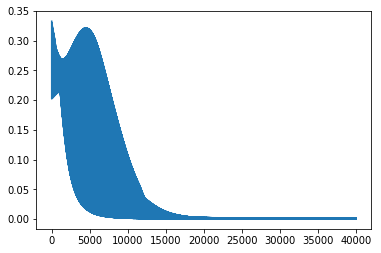

In [13]:
plt.plot(losses)

## Checking Output

In [14]:
[myNet(i) for i in myDataObject.X]

[tensor([0.0225, 0.9775], grad_fn=<SigmoidBackward>),
 tensor([0.9562, 0.0438], grad_fn=<SigmoidBackward>),
 tensor([0.9798, 0.0202], grad_fn=<SigmoidBackward>),
 tensor([0.0228, 0.9772], grad_fn=<SigmoidBackward>)]